# Pymaceuticals Inc.
---

### Analysis

- There is a lot of analysis that we can take away from all the graphs and tables that we made in this assingment but I will focus on what I think is the biggest take away. To me the biggest take away is the relationship between Tumor size and the different drug regimen as we can see in the box and whisker plot. This to me is the biggest take away as it does a great job showing the difference between the drug regimens and clearly shows that there is an actual difference in the efficacy of the regimens. We would need to do some type of statistical analysis like a p-test to see if there was a statistically significant difference but this graph tells me that it is worth running a deeper analysis as the means of the groups Capomulin and Ramicane are we below Ketapril and Propriva. To me this point is further supported by the graph showing the Tumor Volume vs timepoint for a singular mouse being treated with Capomulin. This line graphs shows a clear decline in the tumor volume over time, but again since it is just one mouse there should definitely be more analysis into this relationship. 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how="left")

# Display the data table for preview
merged_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice.
len(merged_mouse_data['Mouse ID'].unique())

249

In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_to_remove = merged_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
new1 = merged_mouse_data.loc[duplicates_to_remove]
new1['Mouse ID'].unique()

array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
new1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
keep = merged_mouse_data.loc[merged_mouse_data['Mouse ID'] != "g989"]
keep

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [17]:
# Checking the number of mice in the clean DataFrame.
len(keep['Mouse ID'].unique())

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_group = keep.groupby('Drug Regimen')
mean_column = Drug_group['Tumor Volume (mm3)'].mean()
median_column = Drug_group['Tumor Volume (mm3)'].median()
var_column = Drug_group['Tumor Volume (mm3)'].var()
std_column = Drug_group['Tumor Volume (mm3)'].std()
SEM_column = Drug_group['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume" : mean_column,
    "Median Tumor Volume" : median_column,
    "Tumor Volume Variance" : var_column,
    "Tumor Volume Std. Dev." : std_column,
    "Tumor Volume Std. Err." : SEM_column,
})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
keep.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ['mean', 'median', 'var','std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

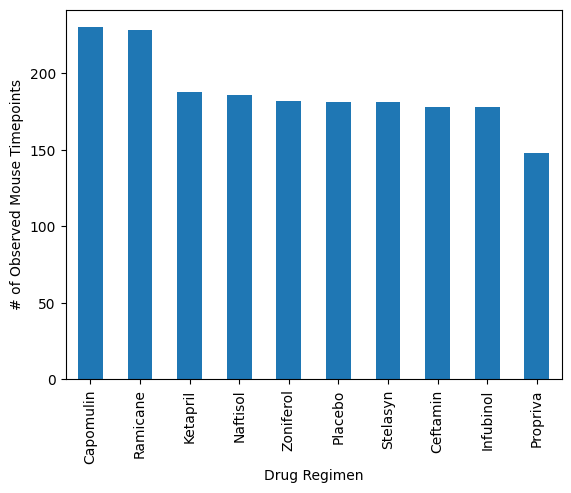

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = Drug_group['Timepoint'].count()
drug_chart = drug_count.sort_values(ascending=False).plot(kind='bar')
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("# of Observed Mouse Timepoints")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

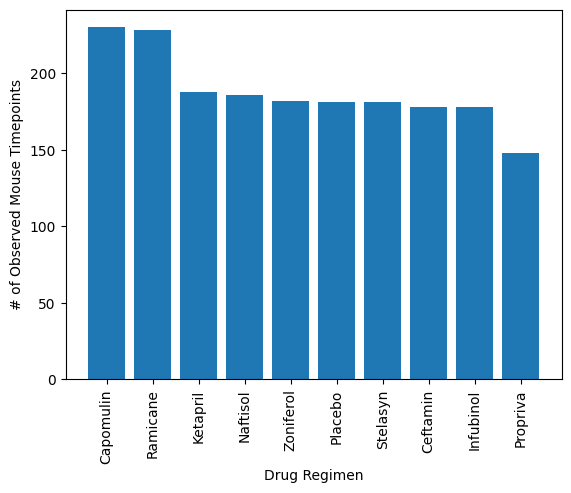

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = Drug_group['Timepoint'].count().sort_values(ascending=False).reset_index()
y_axis = drug_count['Timepoint']
x_axis = drug_count['Drug Regimen']
plt.bar(x_axis, y_axis, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

Text(24.000000000000007, 0.5, '# of Observed Mouse Timepoints')

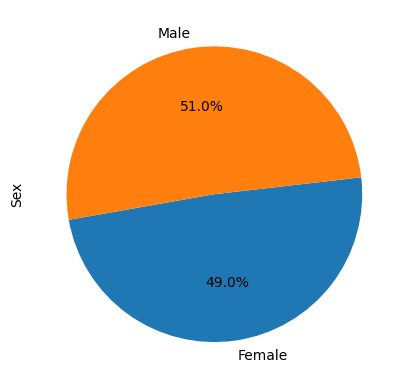

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = keep.groupby('Sex').count()
sex_count = sex_group['Timepoint']
sex_chart = sex_count.plot(kind='pie',autopct="%1.1f%%", startangle= 190, ylabel="Sex")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("# of Observed Mouse Timepoints")

#WRONG NUMBERS

(-1.0999993313426695,
 1.0999965128809746,
 -1.0999938966517655,
 1.0999992948652282)

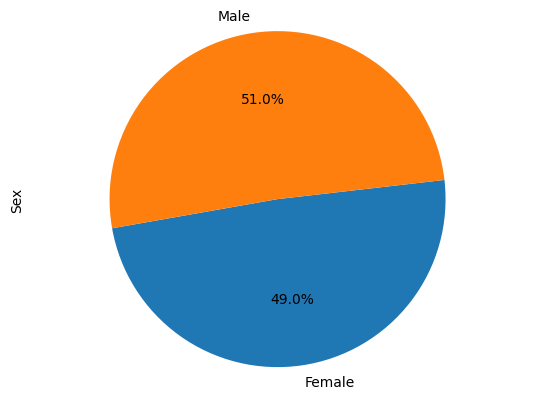

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = sex_group['Timepoint'].reset_index()
sex_labels = sex_count['Sex']
count = sex_count['Timepoint']
plt.pie(count, labels = sex_labels, autopct="%1.1f%%", startangle=190)
plt.ylabel('Sex')
plt.axis("equal")

#WRONG NUMBERS

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
small_keep = keep.loc[(keep['Drug Regimen'] == 'Ceftamin') | (keep['Drug Regimen'] =='Infubinol') | (keep["Drug Regimen"] == 'Ramicane') |  (keep['Drug Regimen'] =='Capomulin')]
# Start by getting the last (greatest) timepoint for each mouse
small_group = small_keep.groupby('Mouse ID')
test1 = small_group['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
test_merge = pd.merge(small_keep, test1, on=['Mouse ID', 'Timepoint'], how="inner")

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [value for value in test_merge['Drug Regimen'].unique()]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_data  = test_merge[test_merge['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    quart = treatment_data.quantile([0.25, 0.75])
    lowerq = quart[0.25]
    upperq = quart[0.75]
    iqr = upperq- lowerq 
    
    # add subset 
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    # add subset 
    print(f"{treatment}'s potenial outliers: {potential_outliers}")


Ceftamin's potenial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potenial outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potenial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potenial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


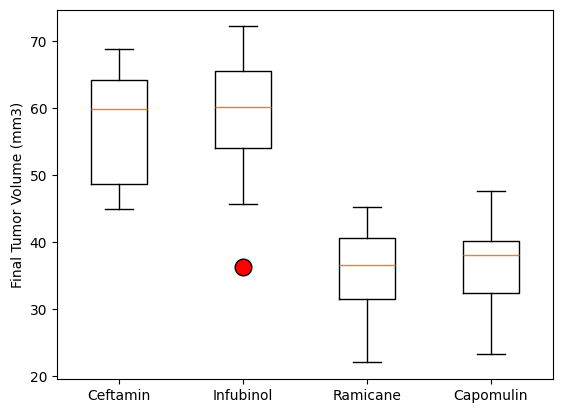

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, flierprops=dict(markerfacecolor = "r", markersize=12))
ax1.set_xticklabels(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

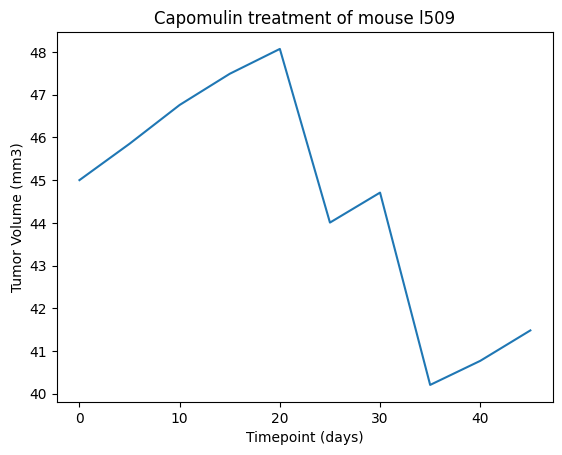

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_group = keep.loc[(keep['Drug Regimen'] == 'Capomulin')]
one_mouse = Capomulin_group.loc[Capomulin_group['Mouse ID'] == "l509"]
x_axis = one_mouse['Timepoint']
y_axis = one_mouse['Tumor Volume (mm3)']

fig1, ax2 = plt.subplots()
ax2.plot(x_axis, y_axis)
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Timepoint (days)')
ax2.set_title("Capomulin treatment of mouse l509")
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

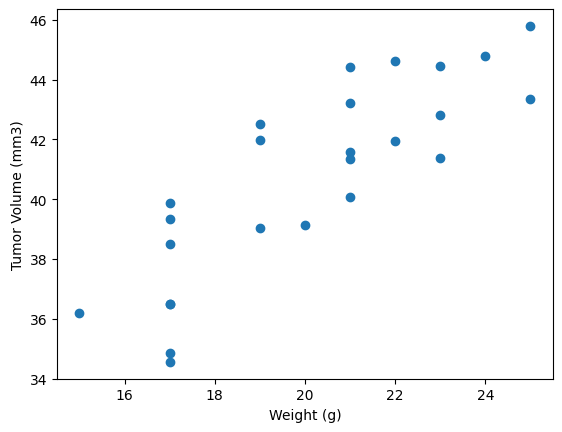

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_groupby_mouse = Capomulin_group.groupby('Mouse ID')

x_axis = Capomulin_groupby_mouse['Weight (g)'].mean()
y_axis = Capomulin_groupby_mouse['Tumor Volume (mm3)'].mean()

#cap_group2 = weight_group[weight_group['Drug Regimen'] == "Capomulin"]

fig1, ax3 = plt.subplots()
ax3.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')


## Correlation and Regression

The correlation between both factors is 0.84


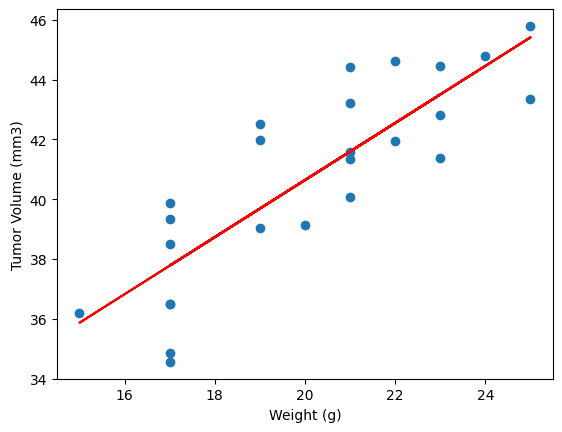

In [60]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {slope:.2f}x  + {intercept:.2f}"
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
correlation = st.pearsonr(x_axis,y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")